# Naive Bayes Classifier

In [1]:
weather=['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy',
         'Overcast', 'Sunny', 'Sunny','Rainy', 'Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild', 'Cool', 'Cool','Cool','Mild','Cool',
     'Mild','Mild','Mild','Hot','Mild']
result=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes',
     'Yes','Yes','Yes','No']

In [2]:
#mengubah string menjadi angka
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(result)
print('weather :', weather_encoded)
print('temp :', temp_encoded)
print('label :', label)

weather : [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
temp : [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
label : [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [3]:
#menggabungkan weather dan temp menjadi sebuah list
features=list(zip(weather_encoded,temp_encoded))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [4]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(features,label)
predicted=model.predict([[0,2]])
predicted

array([1], dtype=int64)

In [5]:
from sklearn import datasets 
wine=datasets.load_wine()
print('features:',wine.feature_names)
print('labels :', wine.target_names)

features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
labels : ['class_0' 'class_1' 'class_2']


In [6]:
wine.data.shape

(178, 13)

In [7]:
wine.data[0:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [8]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(wine.data, wine.target,
                                              test_size=0.3, random_state=109)


In [10]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
y_pred

array([0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1,
       0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0,
       0, 2, 2, 0, 1, 1, 2, 0, 0, 2])

In [11]:
from sklearn import metrics
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9074074074074074


# Decision Tree Classifier

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
col_names=['pregnant', 'glucose', 'bp','skin',
          'insulin','bmi','pedigree','age','label']
pima=pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv',
                header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [14]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [15]:
numer=['pregnant','insulin','bmi','age','glucose',
      'bp','pedigree','label']
#coerce for missing value
for col in numer:
    pima[col]=pd.to_numeric(pima[col], errors='coerce')
pima.dropna(inplace=True)


In [16]:
feature_cols=['pregnant','insulin','bmi','age','glucose',
      'bp','pedigree']
x=pima[feature_cols]
y=pima.label
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                              test_size=0.3,
                                             random_state=1)
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))


Accuracy : 0.6753246753246753


In [17]:
#Optimization Decision Tree Performance
clf=DecisionTreeClassifier(criterion='entropy',
                          max_depth=3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print('Accuracy : ',metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.7705627705627706


In [18]:
#Random Forest
from sklearn import datasets
iris=datasets.load_iris()
print(iris.target_names)
print(iris.feature_names)
print(iris.data[0:5])
print(iris.target)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
data=pd.DataFrame(iris.data, columns=iris.feature_names)
data['species']=iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
from sklearn.model_selection import train_test_split
x=data[iris.feature_names]
y=data['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.3)


In [21]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_pred

array([2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0, 1, 2,
       0])

In [22]:
#memeriksa akurasi
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333

In [23]:
#memprediksi dengan input baru
clf.predict([[3,4,5,2]])

array([2])

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict


In [25]:
import pandas as pd
feature_imp=pd.Series(clf.feature_importances_,
                      index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.455424
petal width (cm)     0.415073
sepal length (cm)    0.101541
sepal width (cm)     0.027963
dtype: float64

No handles with labels found to put in legend.


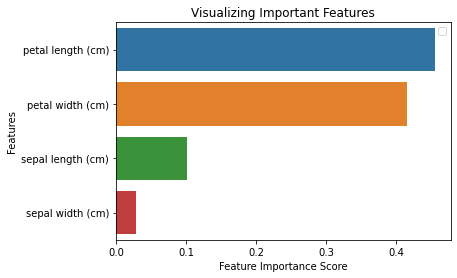

In [26]:
#visualisai
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()

In [27]:
from sklearn.model_selection import train_test_split
#menghapus feature sepal width karena tingkat kepentngannya rendah
data2=data.drop(columns=['sepal width (cm)'])
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.70,
                                              random_state=5)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test,y_pred)



0.9523809523809523

In [28]:
cancer=datasets.load_breast_cancer()
print('features :', cancer.feature_names)
print('Labels:', cancer.target_names)

features : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels: ['malignant' 'benign']


In [29]:
cancer.data.shape

(569, 30)

In [30]:
cancer.data[0:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [31]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import svm 
x_train,x_test,y_train,y_test=train_test_split(cancer.data,
                                              cancer.target,
                                              test_size=0.3,
                                              random_state=109)
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [33]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9649122807017544

In [34]:
metrics.precision_score(y_test,y_pred)

0.9811320754716981

In [35]:
metrics.recall_score(y_test,y_pred)

0.9629629629629629

In [36]:
import os
os.environ

environ{'ALLUSERSPROFILE': 'C:\\ProgramData',
        'APPDATA': 'C:\\Users\\Administrator\\AppData\\Roaming',
        'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
        'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
        'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
        'COMPUTERNAME': 'DESKTOP-46QQ931',
        'COMSPEC': 'C:\\Windows\\system32\\cmd.exe',
        'CONDA_DEFAULT_ENV': 'base',
        'CONDA_EXE': 'C:\\Program Files (x86)\\Anaconda\\Scripts\\conda.exe',
        'CONDA_PROMPT_MODIFIER': '(base) ',
        'CONDA_PYTHON_EXE': 'C:\\Program Files (x86)\\Anaconda\\python.exe',
        'CONDA_ROOT': 'C:\\Program Files (x86)\\Anaconda',
        'CONDA_SHLVL': '1',
        'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
        'HOMEDRIVE': 'C:',
        'HOMEPATH': '\\Users\\Administrator',
        'LOCALAPPDATA': 'C:\\Users\\Administrator\\AppData\\Local',
        'LOGONSERVER': '\\\\DESKTOP-46QQ931',
        '

In [37]:
import pandas as pd
import numpy as np
train=pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
weather=['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy',
         'Overcast', 'Sunny', 'Sunny','Rainy', 'Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild', 'Cool', 'Cool','Cool','Mild','Cool',
     'Mild','Mild','Mild','Hot','Mild']
result=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes',
     'Yes','Yes','Yes','No']
#mengubah data menjadi kode numerik
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(result)
#menggabungkan fitur
features=list(zip(weather_encoded,temp_encoded))
#Gaussian NB
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(features,label)
pred=model.predict([[0,2]])
pred

array([1], dtype=int64)

In [39]:
print('weather:',weather_encoded)
print('temperature :', temp_encoded)

weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
temperature : [1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [40]:
weather_dict={}
temp_dict={}
for i in range(len(weather)): 
    weather_dict[weather[i]]=weather_encoded[i]
for i in range(len(temp)): 
    temp_dict[temp[i]]=temp_encoded[i]
print(weather_dict)
print(temp_dict)
    
    

{'Sunny': 2, 'Overcast': 0, 'Rainy': 1}
{'Hot': 1, 'Mild': 2, 'Cool': 0}


In [41]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

labels=['pregnant', 'glucose', 'bp','skin',
          'insulin','bmi','pedigree','age','label']
diabetesDF=pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv',
                header=1, names=labels)
diabetesDF.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [42]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  767 non-null    int64  
 1   glucose   767 non-null    int64  
 2   bp        767 non-null    int64  
 3   skin      767 non-null    int64  
 4   insulin   767 non-null    int64  
 5   bmi       767 non-null    float64
 6   pedigree  767 non-null    float64
 7   age       767 non-null    int64  
 8   label     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
#pastikan data kita numerik
for lab in labels:
    diabetesDF[lab]=pd.to_numeric(diabetesDF[lab])

In [44]:
diabetesDF.dropna(inplace=True)
diabetesDF

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [45]:
feature_col=['pregnant', 'glucose', 'bp','skin',
          'insulin','bmi','pedigree','age']
independen=diabetesDF[feature_col]
dependen=diabetesDF['label']


In [46]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(independen,dependen)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [47]:
from sklearn import metrics
trained_model=metrics.accuracy_score(y_pred,y_test)

In [48]:
model_opt=DecisionTreeClassifier( max_depth=4)
model_opt=model_opt.fit(x_train,y_train)
modelOpt_y_pred=model_opt.predict(x_test)
metrics.accuracy_score(modelOpt_y_pred,y_test)

0.7239583333333334

In [ ]:
import sklearn
from sklearn import tree
import pydotplus
from six import StringIO
from IPython.display import Image
dot_data=StringIO()
tree.export_graphviz(model, out_file=dot_data,
                    class_names=['0','1'], feature_names=feature_col)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [50]:
import sklearn.datasets as datasets
datasets=datasets.load_iris()

In [51]:
datasets.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [52]:
datasets.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [53]:
datasets.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [54]:
col=['sepal length','sepal width','petal length','petal width' ]
irisDF=pd.DataFrame(data=datasets.data, columns=col)
irisDF['species']=datasets.target
irisDF.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [61]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(irisDF[col],irisDF['species'],test_size=0.30,random_state=5)
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
metrics.accuracy_score(y_pred,y_test)

0.9333333333333333

In [62]:
feature_imp=pd.Series(classifier.feature_importances_, index=col).sort_values(ascending=True)
feature_imp

sepal length    0.211456
petal length    0.331489
petal width     0.457055
dtype: float64

In [63]:
col=['sepal length','petal length','petal width' ]
irisDF2=irisDF.drop(columns=['sepal width'])
x_train,x_test,y_train,y_test=train_test_split(irisDF2[col],irisDF2['species'],
                                               test_size=0.30,
                                              random_state=5)
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
metrics.accuracy_score(y_pred, y_test)

0.9555555555555556